In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/home/bhaskar/Here_we_go_again/VS_code_ting/Bitch/artifacts/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,top_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [19]:
df['top_score']= df['math score']+ df['reading score']+ df['writing score']
df['avg_score']= (df['top_score']/3).round()

In [25]:
reading_less_20 = df[df['reading score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['avg_score'].count()
math_less_20 = df[df['math score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')



Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


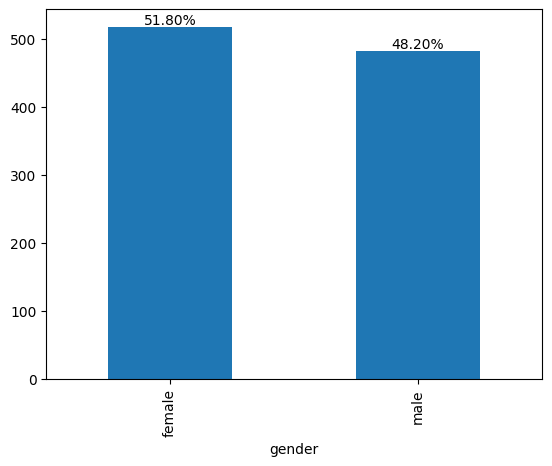

In [8]:
gender_distro= df.gender.value_counts()
ax= gender_distro.plot(kind='bar')
total= gender_distro.sum()
for i, values in enumerate(gender_distro):
    percentage= ((values/total) *100)
    plt.text(i, values, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

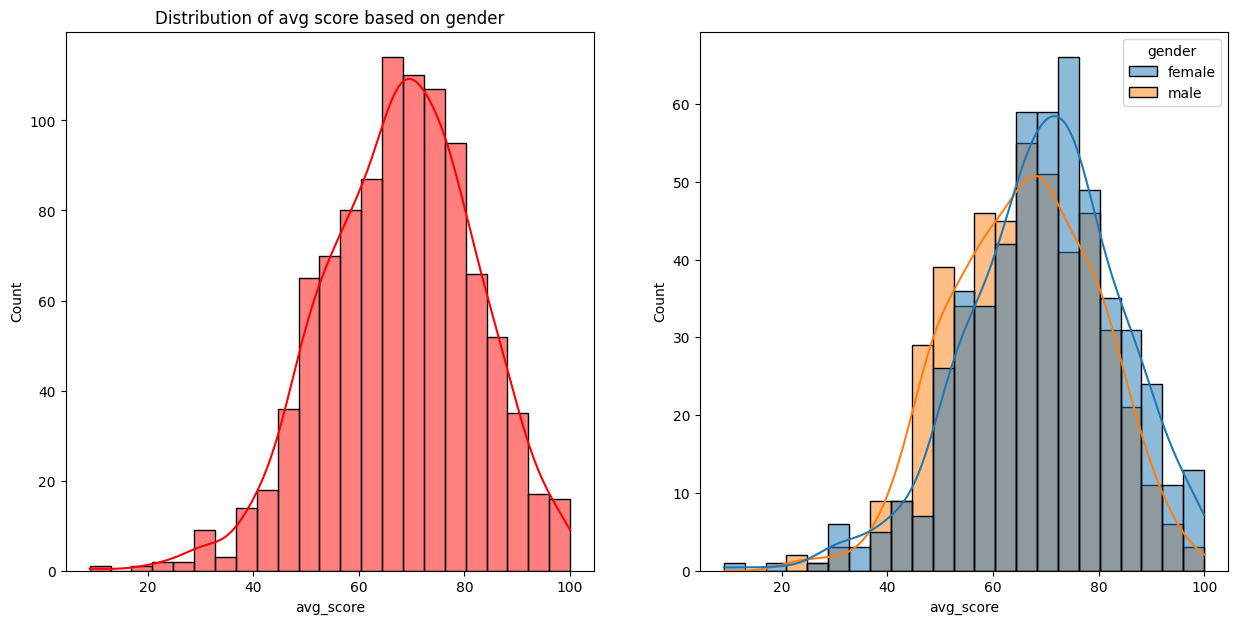

In [34]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

sns.histplot(x='avg_score',data=df,kde=True,color='r', ax=axs[0])
axs[0].set_title('Distribution of avg scores')

sns.histplot(x='avg_score', data=df, kde=True, hue= 'gender', ax= axs[1])
axs[0].set_title('Distribution of avg score based on gender')
plt.show()

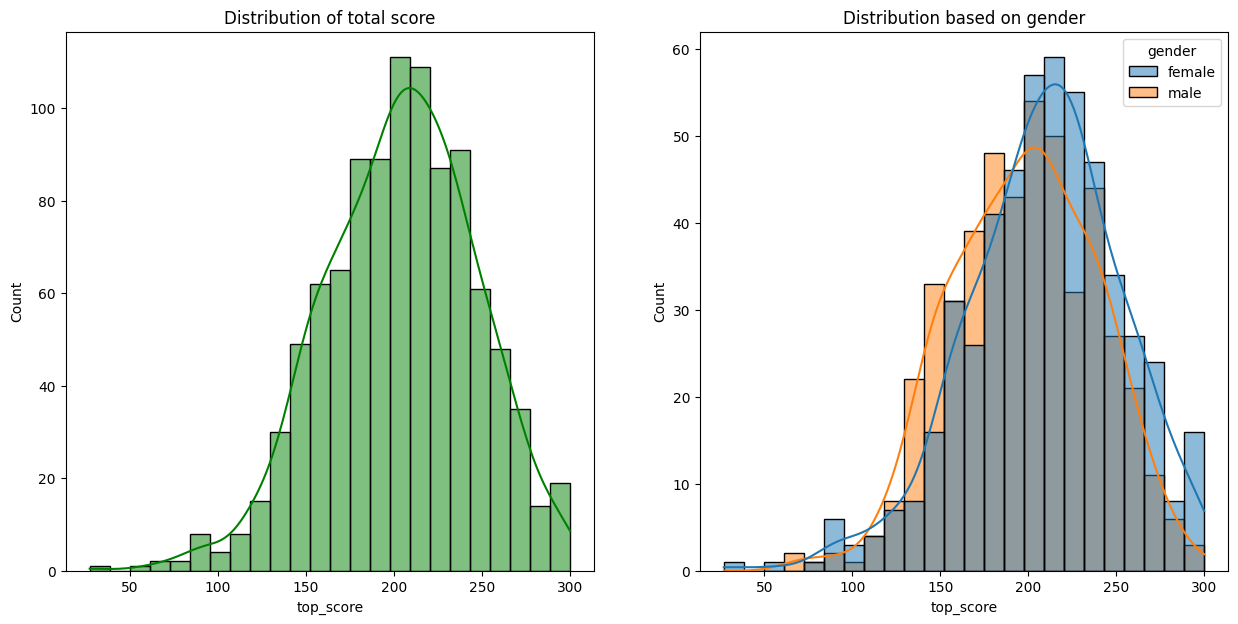

In [47]:
fig, axis = plt.subplots(1,2, figsize=(15,7))

sns.histplot(x='top_score', kde=True, data= df, ax=axis[0], color='green')
axis[0].set_title('Distribution of total score')

sns.histplot(x='top_score', kde=True, hue='gender', data= df, ax=axis[1])
axis[1].set_title('Distribution based on gender')

plt.show()

Text(0.5, 1.0, 'Male students distribution')

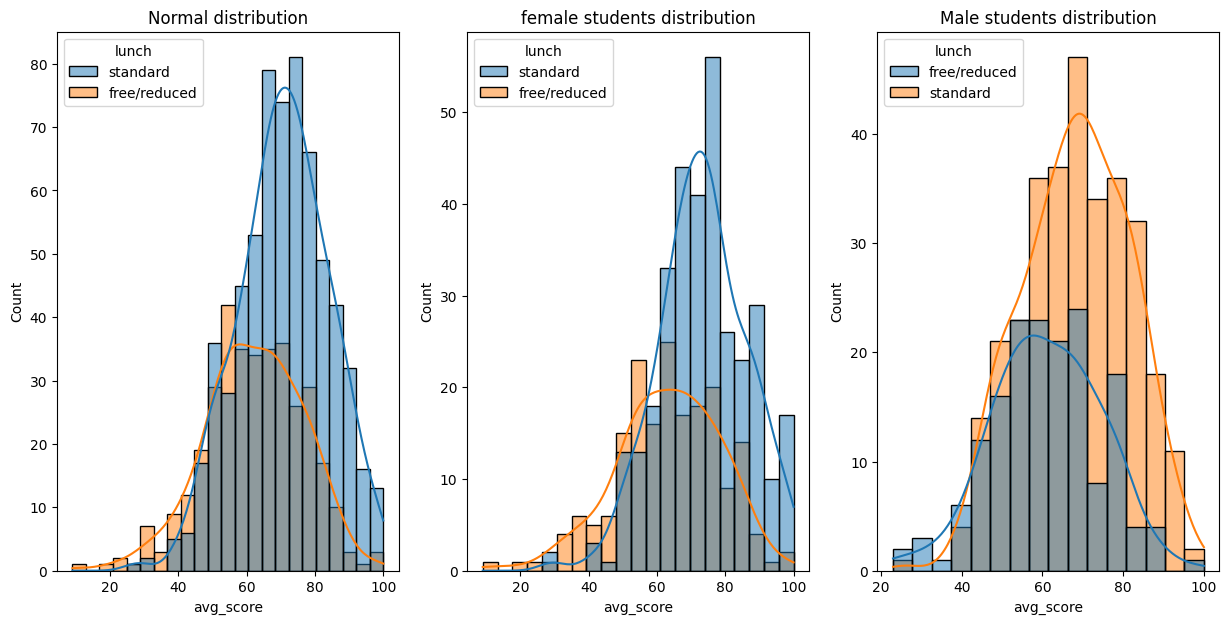

In [50]:
fig, axis = plt.subplots(1,3, figsize=(15,7))

sns.histplot(data= df, x='avg_score', kde=True, hue= 'lunch', ax= axis[0])
axis[0].set_title("Normal distribution")
sns.histplot(data= df[df.gender=='female'], x='avg_score', kde=True, hue='lunch',ax=axis[1])
axis[1].set_title("female students distribution")
sns.histplot(data=df[df.gender=='male'], x='avg_score', hue='lunch', kde=True, ax=axis[2])
axis[2].set_title("Male students distribution")

Text(0.5, 1.0, 'Male students distribution')

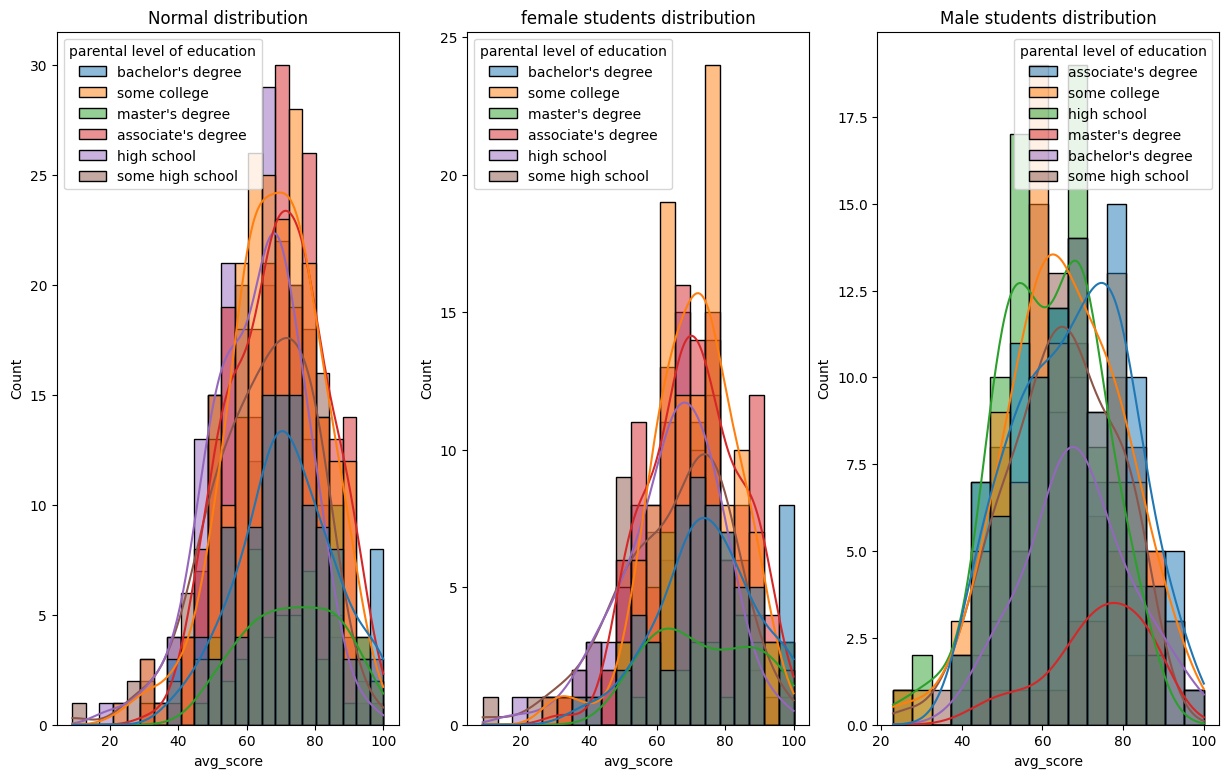

In [54]:
fig, axis = plt.subplots(1,3, figsize=(15,9))

sns.histplot(data=df, x='avg_score', hue='parental level of education', kde=True, ax= axis[0])
axis[0].set_title("Normal distribution")
sns.histplot(data=df[df.gender=='female'], x='avg_score', hue='parental level of education', kde=True, ax= axis[1])
axis[1].set_title("female students distribution")
sns.histplot(data=df[df.gender=='male'], x='avg_score', hue='parental level of education', kde=True, ax= axis[2])
axis[2].set_title("Male students distribution")

Text(0.5, 1.0, 'Male students distribution')

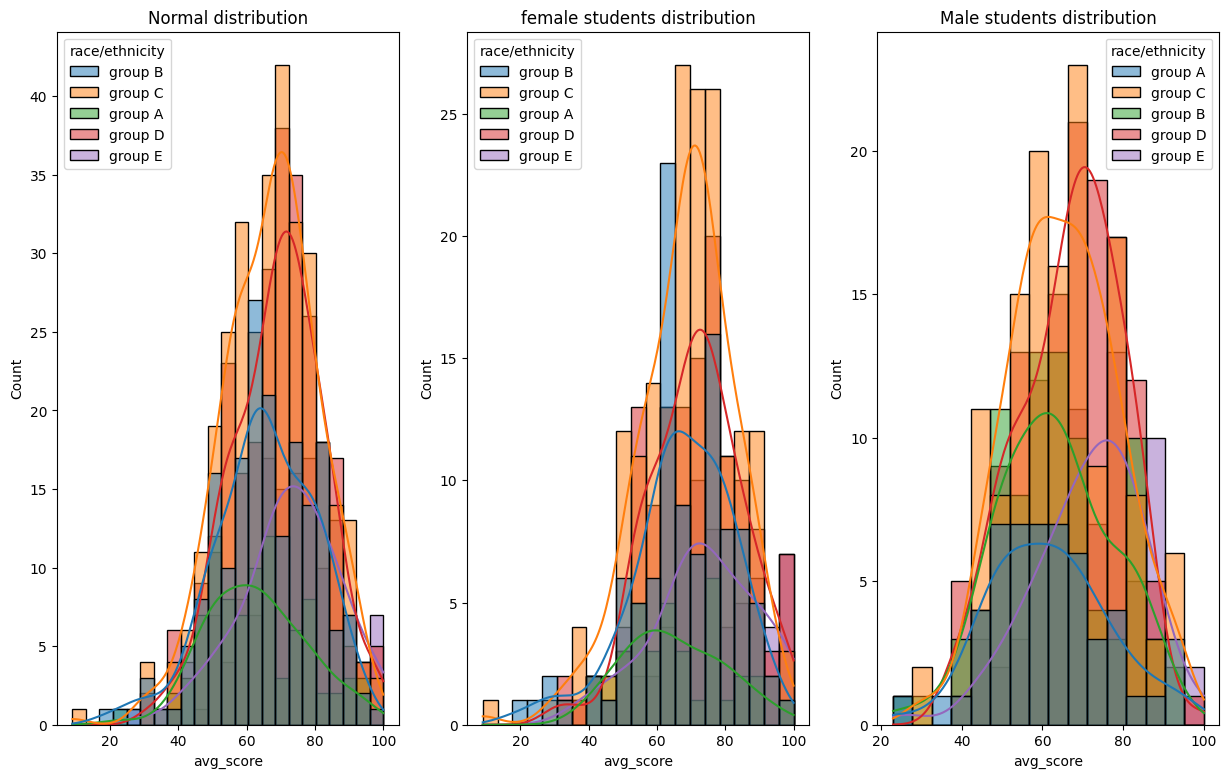

In [55]:
fig, axis = plt.subplots(1,3, figsize=(15,9))

sns.histplot(data=df, x='avg_score', hue='race/ethnicity', kde=True, ax= axis[0])
axis[0].set_title("Normal distribution")
sns.histplot(data=df[df.gender=='female'], x='avg_score', hue='race/ethnicity', kde=True, ax= axis[1])
axis[1].set_title("female students distribution")
sns.histplot(data=df[df.gender=='male'], x='avg_score', hue='race/ethnicity', kde=True, ax= axis[2])
axis[2].set_title("Male students distribution")

/tmp/ipykernel_4502/3475162801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


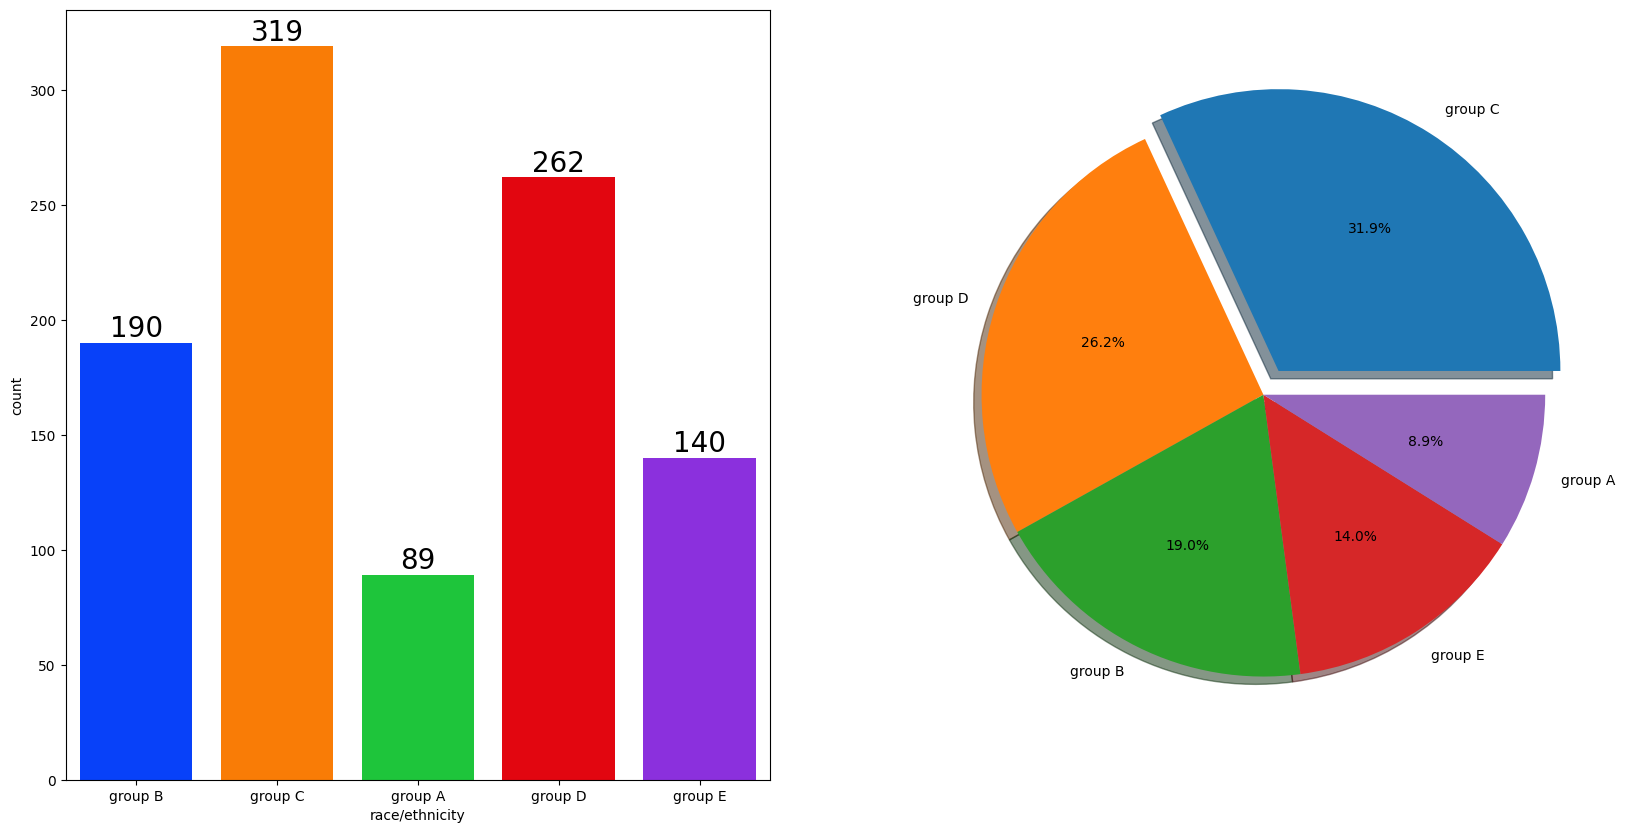

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

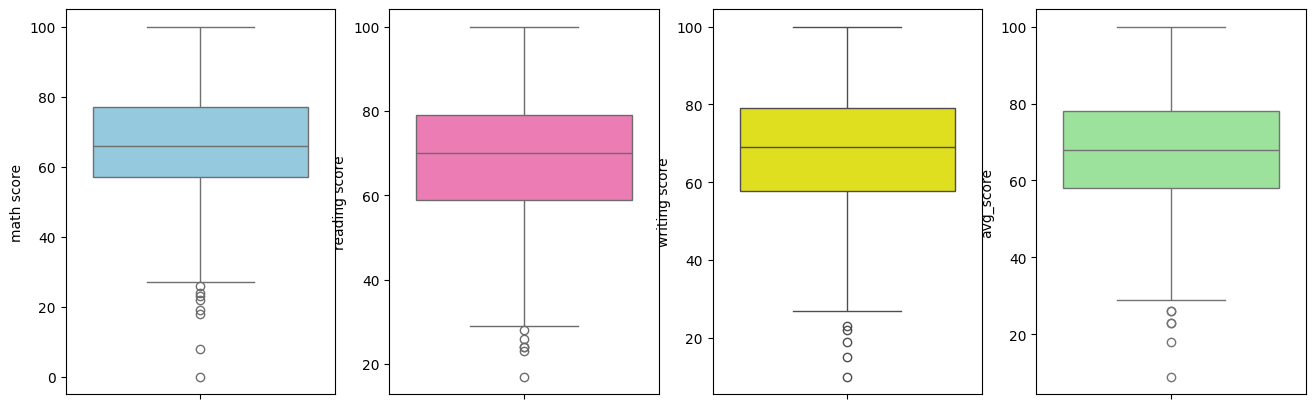

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()